# Context
This notebook drives the training process for different models.

In [247]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../project.env")
sys.path.append(os.environ["PYTHONPATH"])

import pickle

In [248]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup

In [ ]:
TRAIN_classes = 'two-classes'
score_file = os.path.join(sup.TRAIN_SCORES_ROOT, TRAIN_classes, sup.TRAIN_KNN_CODE, "2025-06-08_15:47:17.csv")

# Score analysis

## Helper functions

In [250]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [251]:
def visualize(df, group_cols, top, filter_cols=None, filter_values=None):
    """
    Optionally filters df by filter_cols == filter_values, groups by group_cols,
    selects top `top` rows by accuracy, computes mean accuracy, and plots the result.
    """
    filter_desc = ""

    # Filter if needed
    if filter_cols and filter_values:
        for col, val in zip(filter_cols, filter_values):
            df = df[df[col] == val]
        filter_desc = " | " + " & ".join(f"{col}={val}" for col, val in zip(filter_cols, filter_values))

    # Group, take top `top` by accuracy, compute mean
    mean_accuracies = (
        df.groupby(group_cols)
          .apply(lambda g: g.sort_values('accuracy', ascending=False).head(top)['accuracy'].mean())
          .reset_index(name='mean_accuracy')
    )

    # Create simple string labels for the x-axis
    mean_accuracies['label'] = mean_accuracies[group_cols].astype(str).agg(' | '.join, axis=1)

    # Plot
    colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))
    plt.figure(figsize=(10, 6))
    plt.bar(mean_accuracies['label'], mean_accuracies['mean_accuracy'], color=colors)

    # Add values on bars
    for i, val in enumerate(mean_accuracies['mean_accuracy']):
        plt.text(i, val + 0.001, f"{val:.3f}", ha='center', va='bottom', fontsize=9)

    plt.ylabel(f"Mean Accuracy (Top {top})")
    plt.title(f"Top {top} Mean Accuracies per {' + '.join(group_cols)}{filter_desc}")
    plt.xticks(rotation=45, ha='right')

    # Set y-limits with padding
    min_val = mean_accuracies['mean_accuracy'].min()
    max_val = mean_accuracies['mean_accuracy'].max()
    padding = (max_val - min_val) * 0.3  # 10% padding
    plt.ylim(max(min_val - padding, 0), min(max_val + padding, 1))

    plt.tight_layout()
    plt.show()


## Data

In [ ]:
import pandas as pd

In [253]:
knn_scores_df = pd.read_csv(score_file)
knn_scores_df = knn_scores_df.fillna('None')
knn_scores_df.sort_values(by="accuracy", ascending=False)

,class_list,accuracy,data_unit,PH2,PH3,reducer,kernel,n,k
2565,two-classes,0.988281,Spf,False,False,None,None,-1,1
2280,two-classes,0.986328,Spf,False,True,umap,None,4,1
274,two-classes,0.985030,AHpf,True,True,pca,None,4,5
631,two-classes,0.985030,AHpf,True,False,None,None,-1,2
511,two-classes,0.984032,AHpf,True,True,kpca,cosine,6,2
...,...,...,...,...,...,...,...,...,...
3816,two-classes,0.441860,Spv,False,True,kpca,sigmoid,7,7
3257,two-classes,0.441860,Spv,False,True,kpca,rbf,1,3
3178,two-classes,0.441860,Spv,True,True,kpca,sigmoid,7,14
3361,two-classes,0.418605,Spv,False,True,kpca,sigmoid,2,2


/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


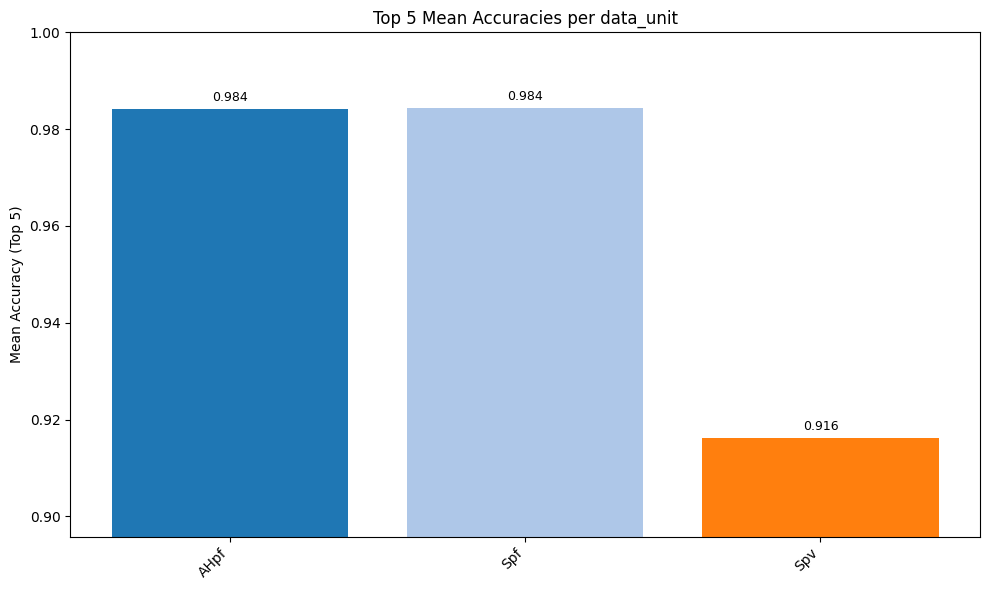

In [254]:
visualize(knn_scores_df, group_cols=['data_unit'], top=5)

### By data unit

#### Ahpf

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


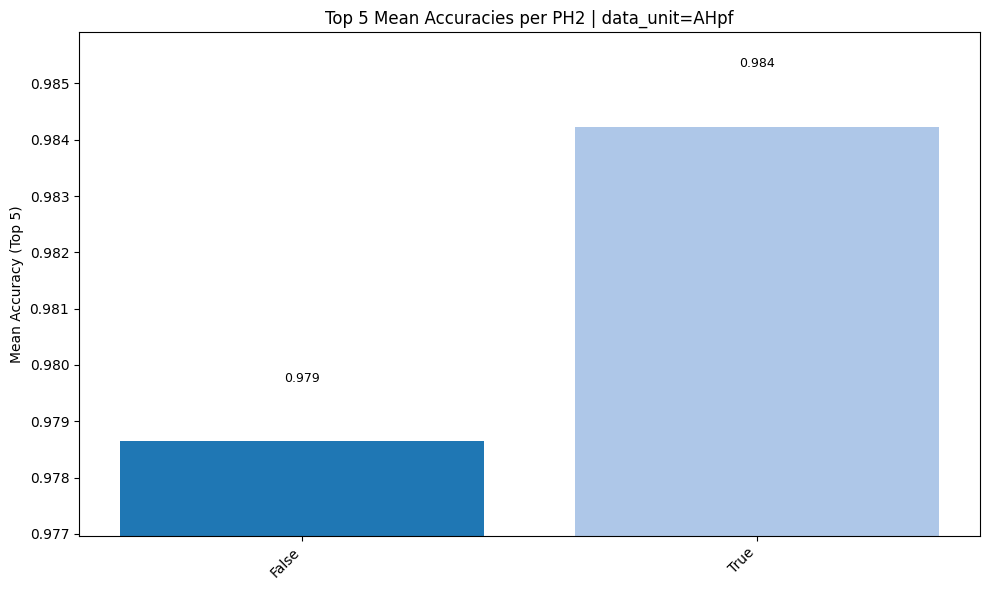

In [255]:
visualize(knn_scores_df, group_cols=['PH2'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_AH_PF])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


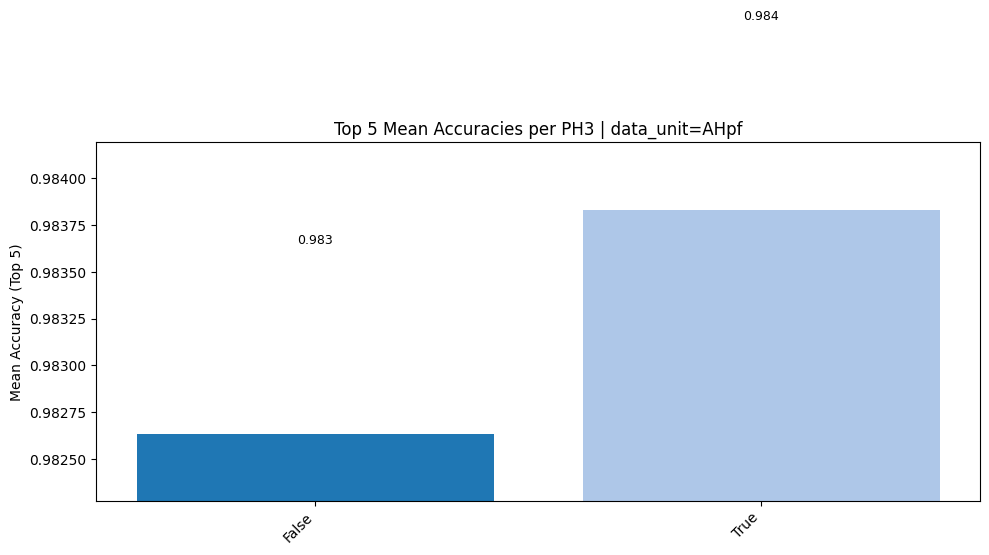

In [256]:
visualize(knn_scores_df, group_cols=['PH3'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_AH_PF])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


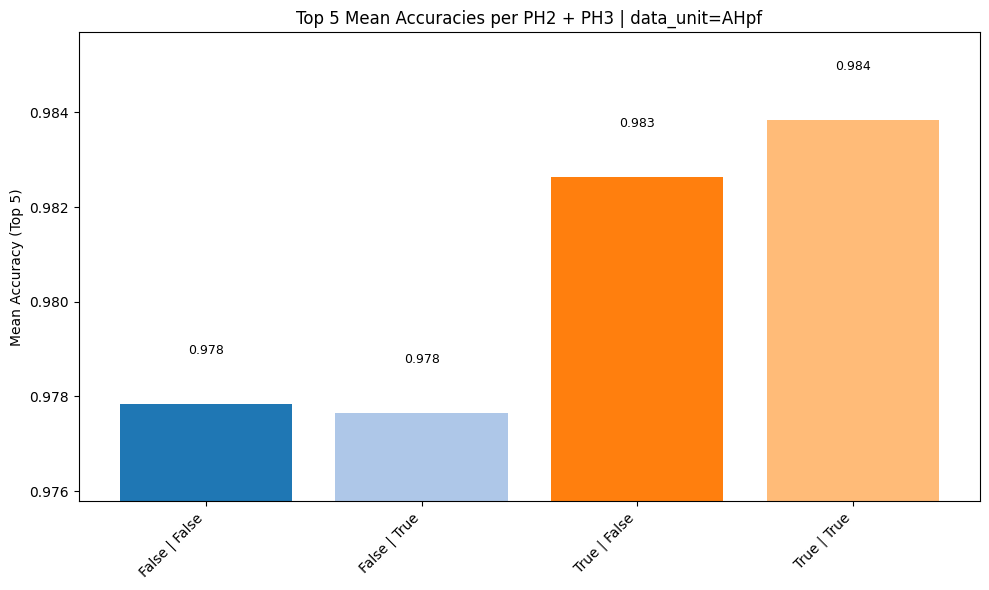

In [257]:
visualize(knn_scores_df, group_cols=['PH2', 'PH3'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_AH_PF])

#### Spf

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


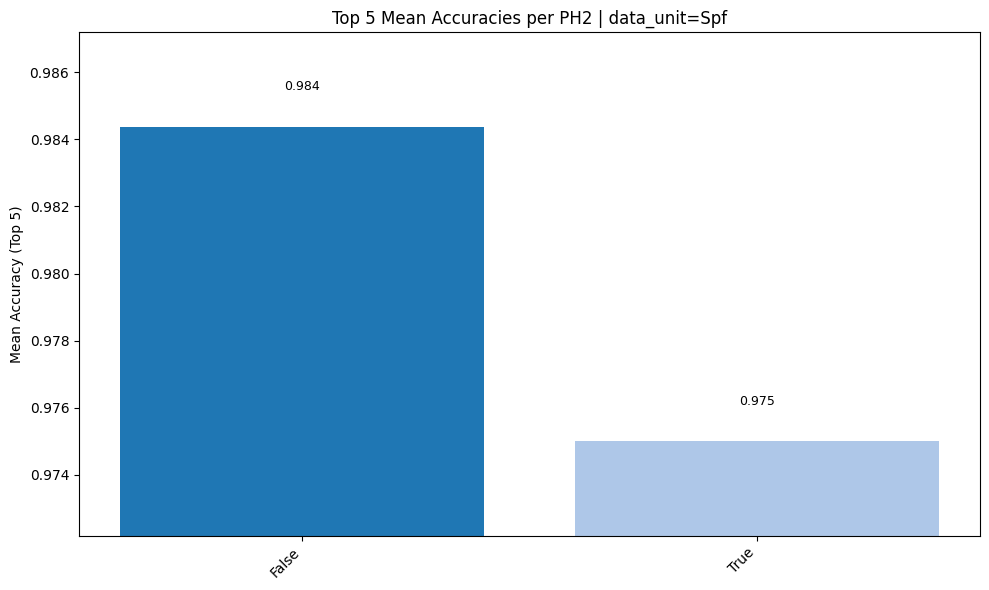

In [258]:
visualize(knn_scores_df, group_cols=['PH2'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_S_PF])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


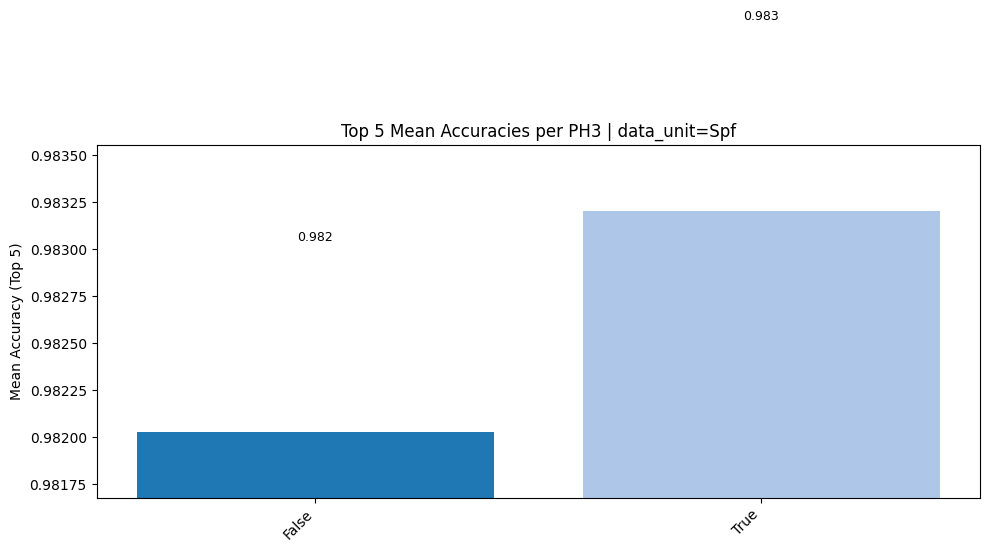

In [259]:
visualize(knn_scores_df, group_cols=['PH3'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_S_PF])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


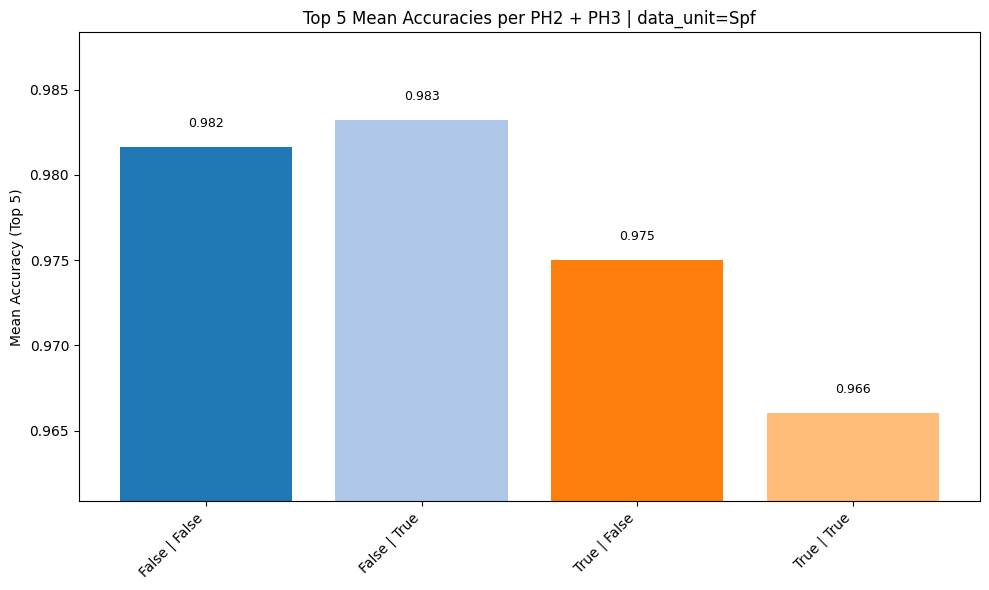

In [260]:
visualize(knn_scores_df, group_cols=['PH2', 'PH3'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_S_PF])

#### Spv

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


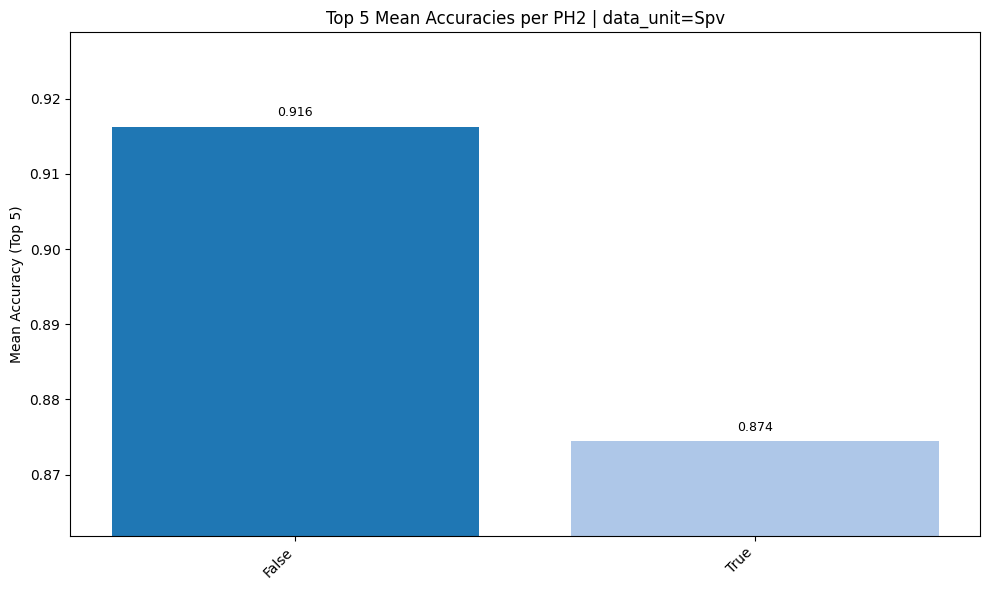

In [261]:
visualize(knn_scores_df, group_cols=['PH2'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_S_PV])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


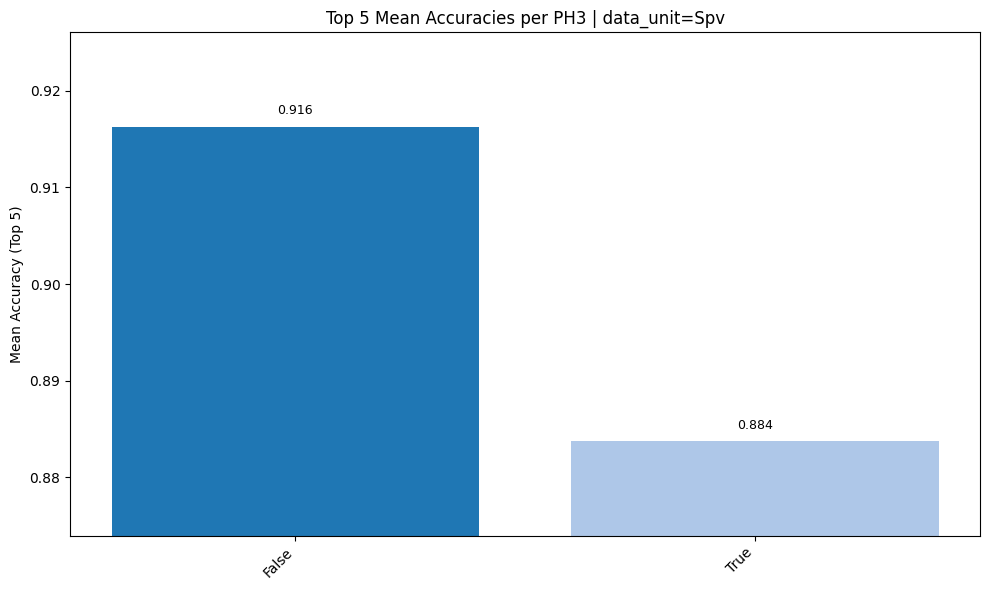

In [262]:
visualize(knn_scores_df, group_cols=['PH3'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_S_PV])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


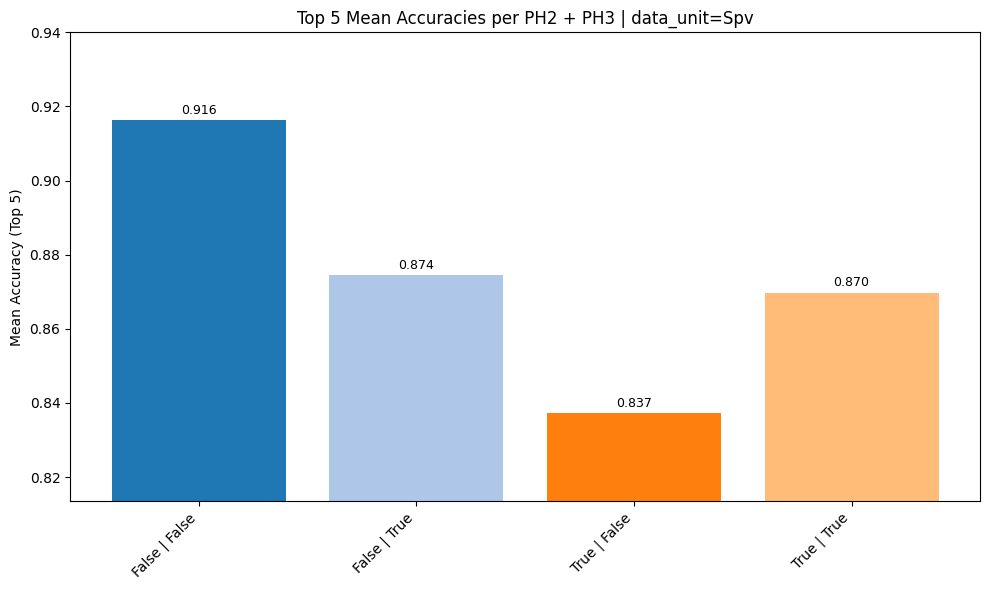

In [263]:
visualize(knn_scores_df, group_cols=['PH2', 'PH3'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_S_PV])

### By reducer

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


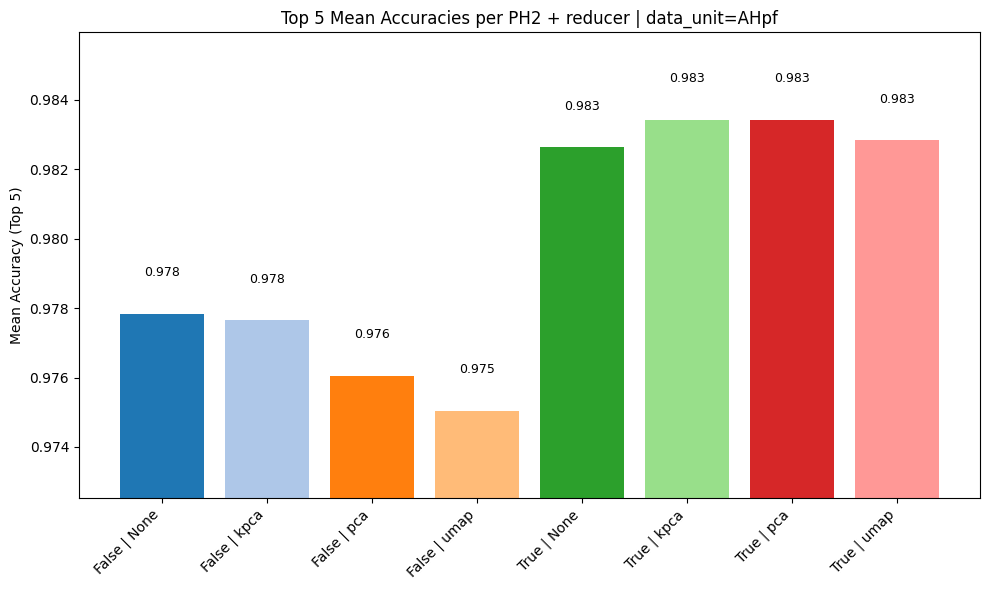

In [264]:
visualize(knn_scores_df, group_cols=['PH2', 'reducer'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_AH_PF])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


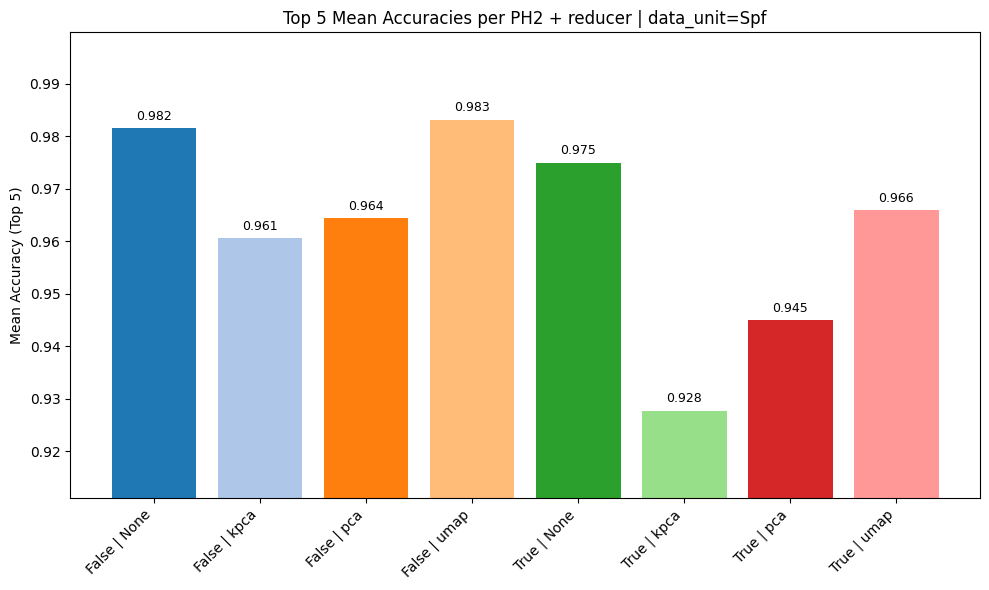

In [265]:
visualize(knn_scores_df, group_cols=['PH2', 'reducer'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_S_PF])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


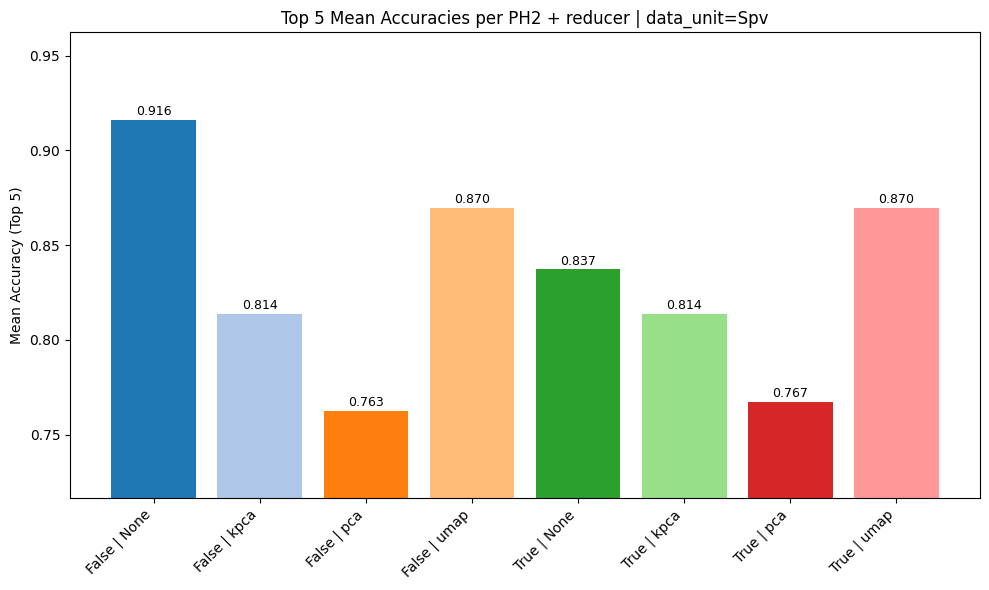

In [266]:
visualize(knn_scores_df, group_cols=['PH2', 'reducer'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_S_PV])

### By kernel

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


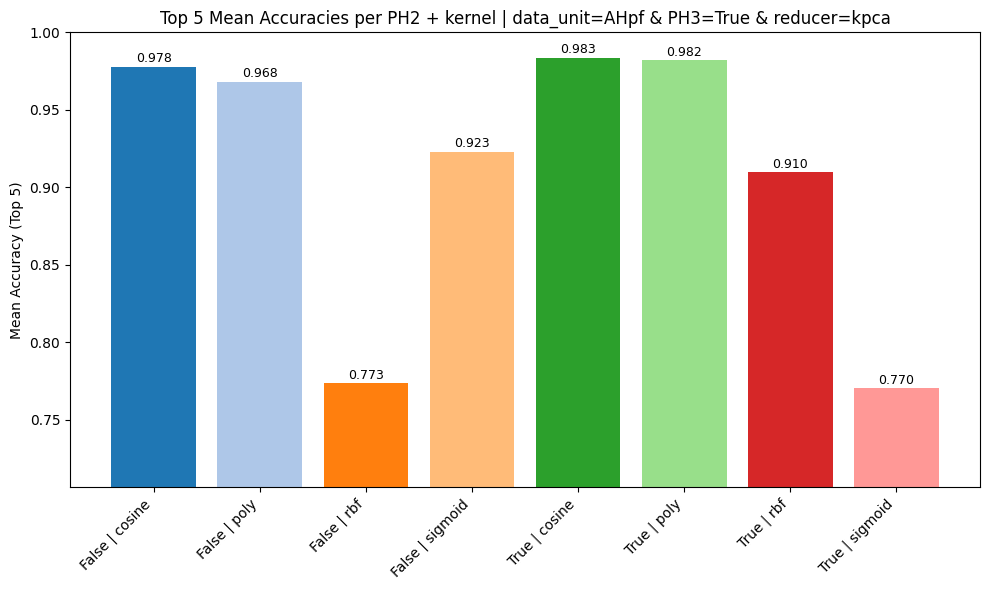

In [267]:
visualize(knn_scores_df, group_cols=['PH2', 'kernel'], top=5, filter_cols=['data_unit', 'PH3', 'reducer'], filter_values=[sup.DATA_AH_PF, True, 'kpca'])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


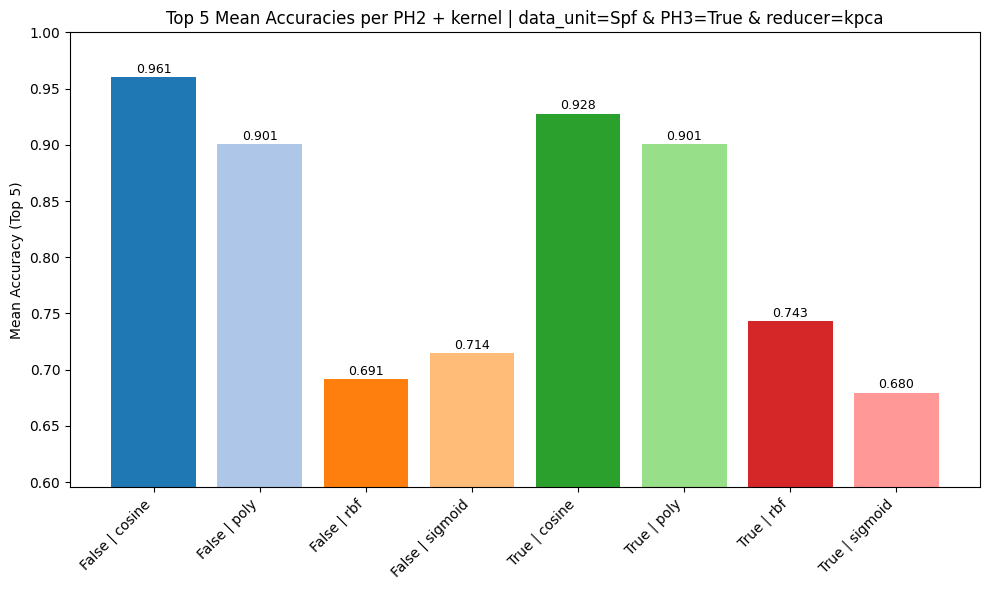

In [268]:
visualize(knn_scores_df, group_cols=['PH2', 'kernel'], top=5, filter_cols=['data_unit', 'PH3', 'reducer'], filter_values=[sup.DATA_S_PF, True, 'kpca'])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


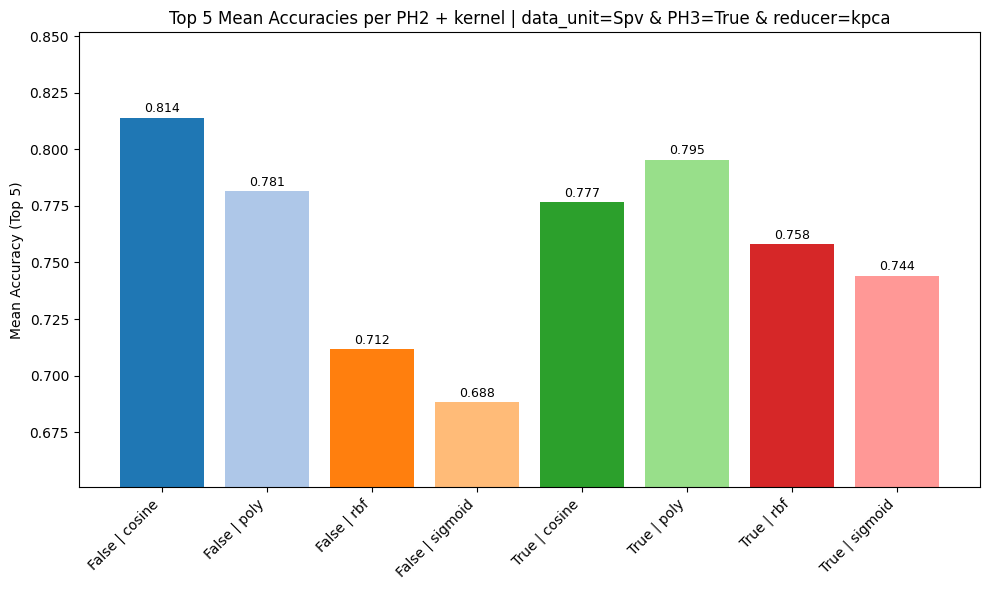

In [269]:
visualize(knn_scores_df, group_cols=['PH2', 'kernel'], top=5, filter_cols=['data_unit', 'PH3', 'reducer'], filter_values=[sup.DATA_S_PV, True, 'kpca'])

### By number of reduction components

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


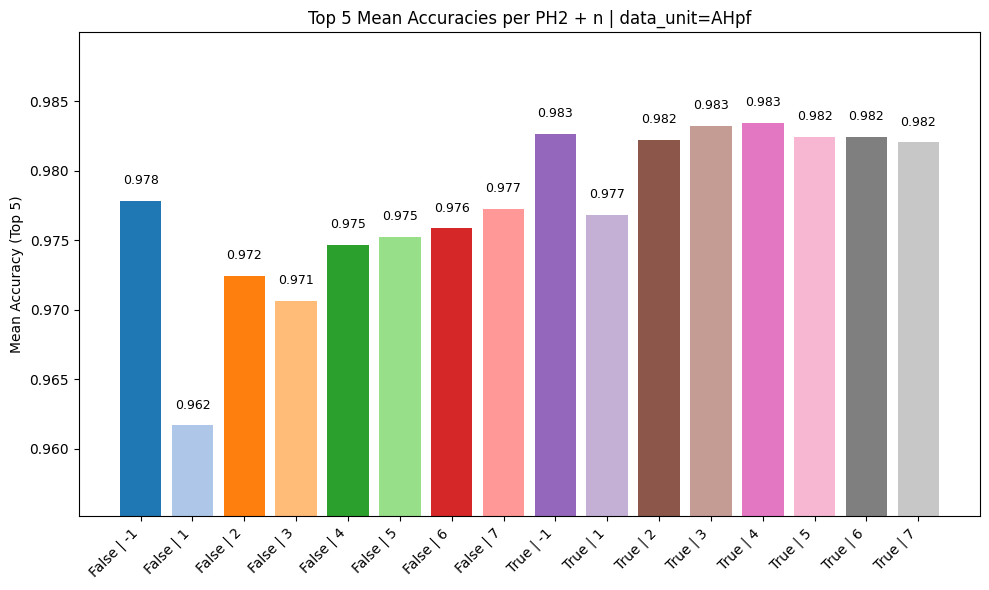

In [270]:
visualize(knn_scores_df, group_cols=['PH2', 'n'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_AH_PF])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


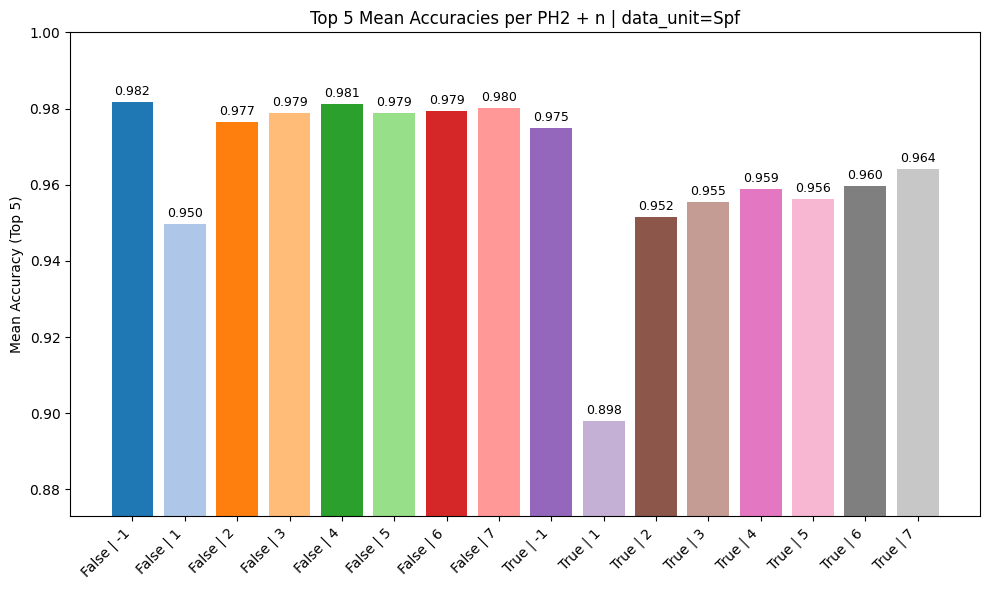

In [271]:
visualize(knn_scores_df, group_cols=['PH2', 'n'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_S_PF])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


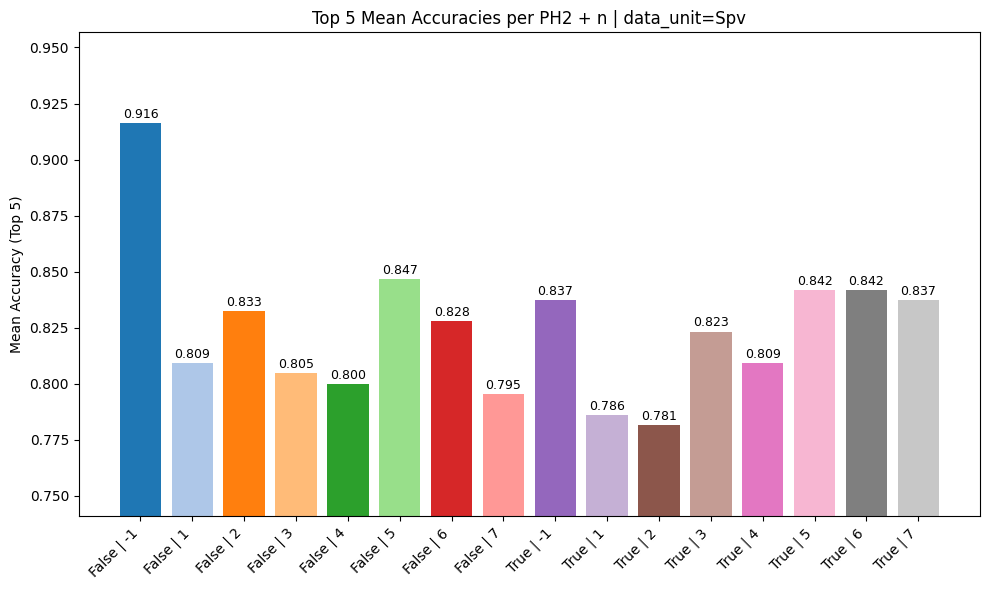

In [272]:
visualize(knn_scores_df, group_cols=['PH2', 'n'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_S_PV])

### By number of neighbors

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


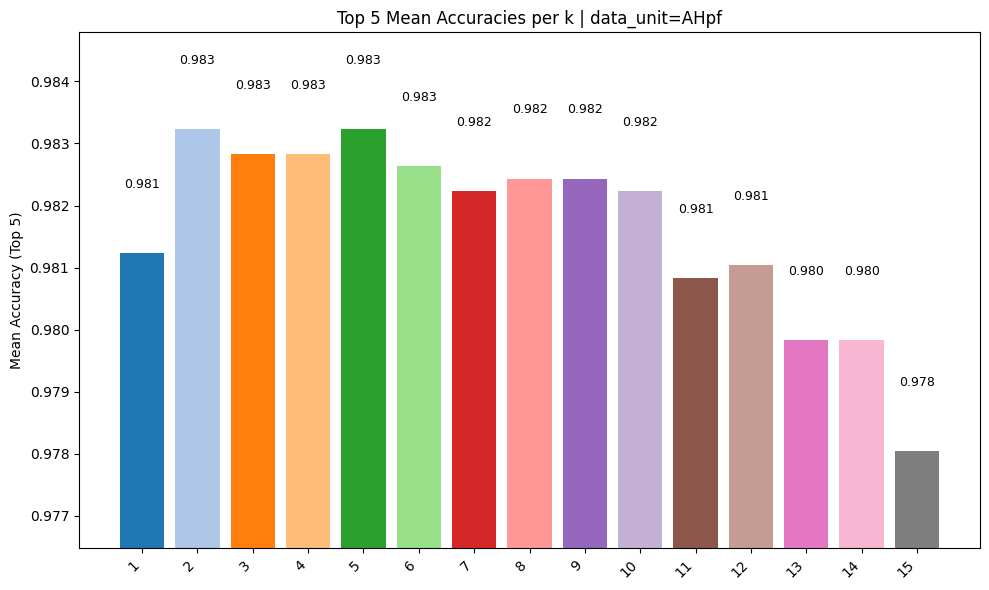

In [273]:
visualize(knn_scores_df, group_cols=['k'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_AH_PF])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


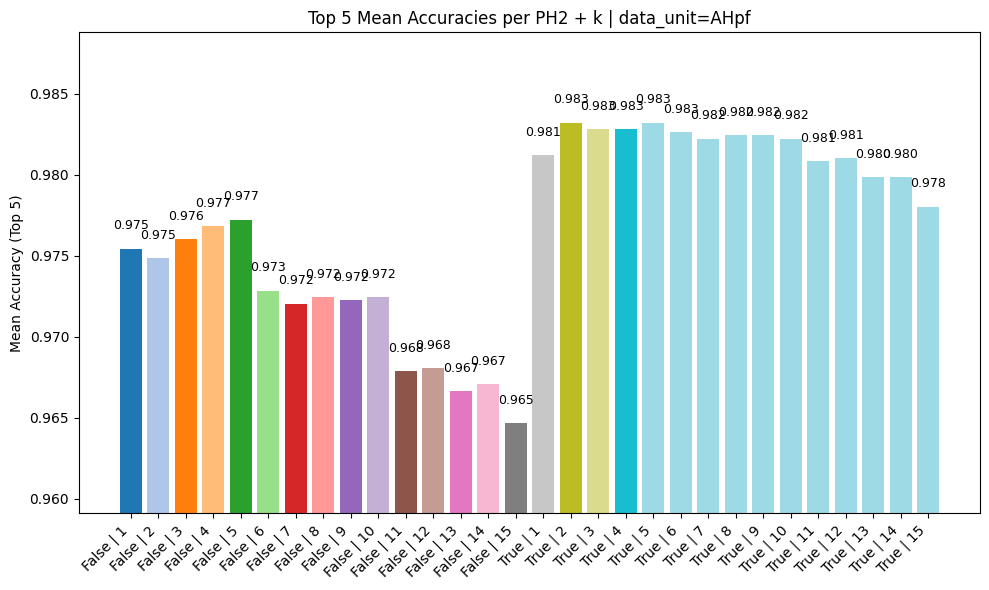

In [274]:
visualize(knn_scores_df, group_cols=['PH2', 'k'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_AH_PF])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


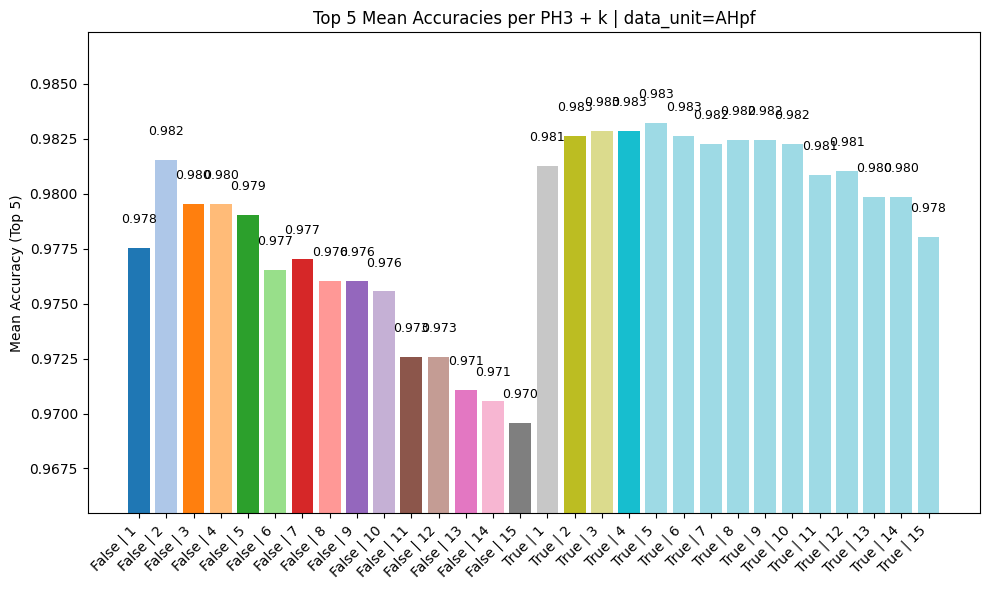

In [275]:
visualize(knn_scores_df, group_cols=['PH3', 'k'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_AH_PF])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


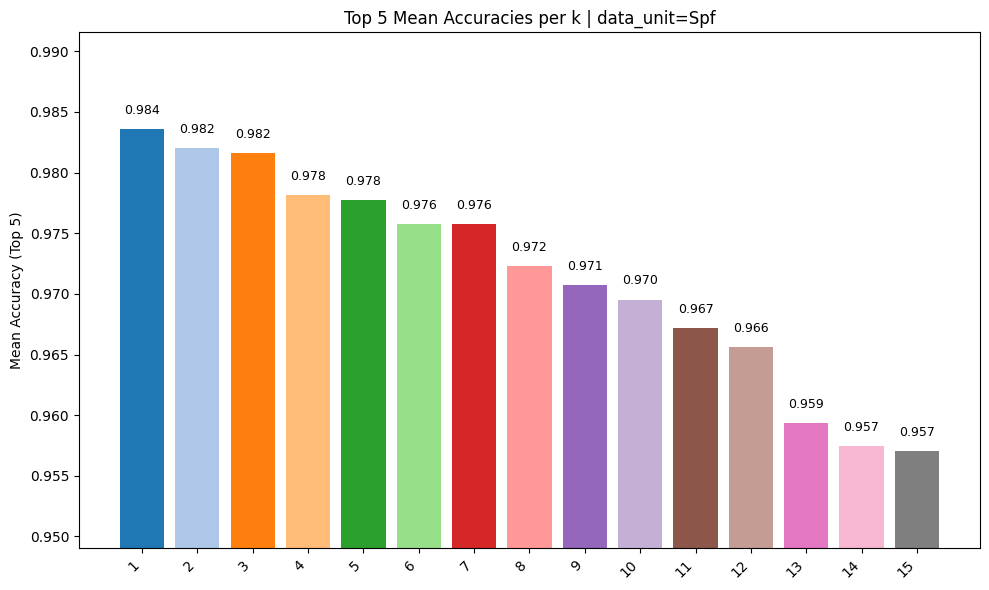

In [276]:
visualize(knn_scores_df, group_cols=['k'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_S_PF])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


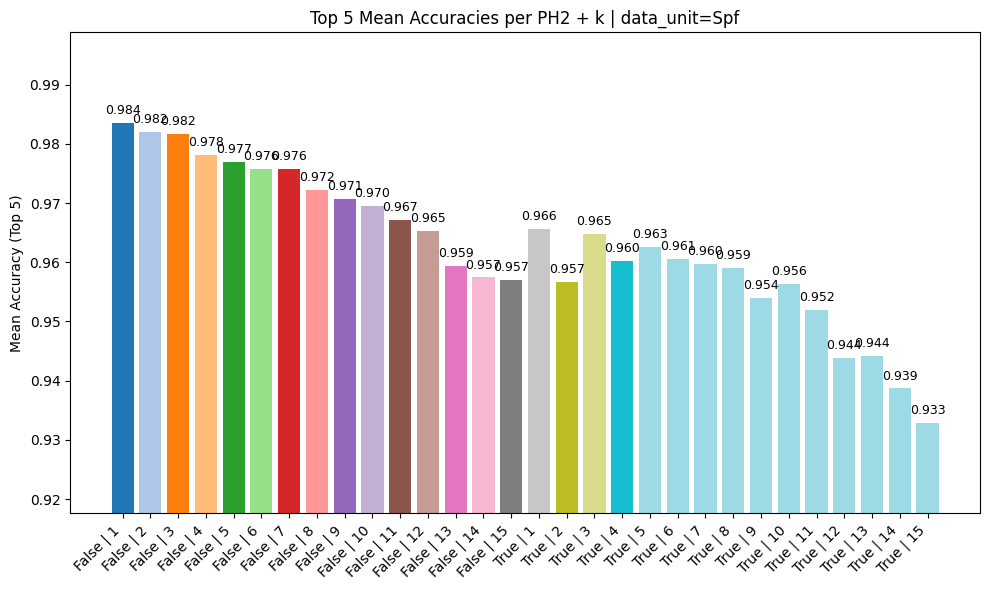

In [277]:
visualize(knn_scores_df, group_cols=['PH2', 'k'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_S_PF])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


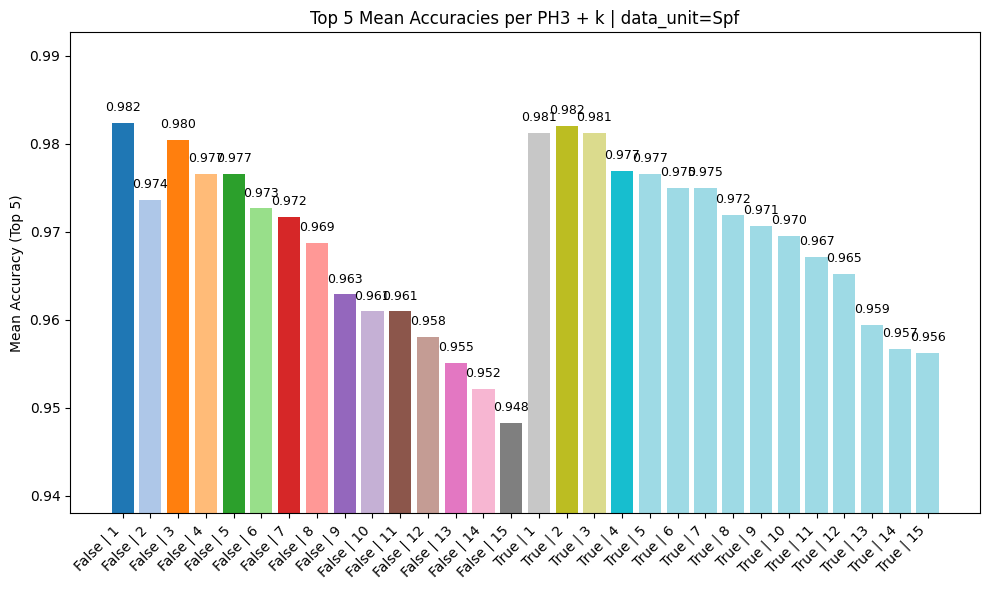

In [278]:
visualize(knn_scores_df, group_cols=['PH3', 'k'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_S_PF])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


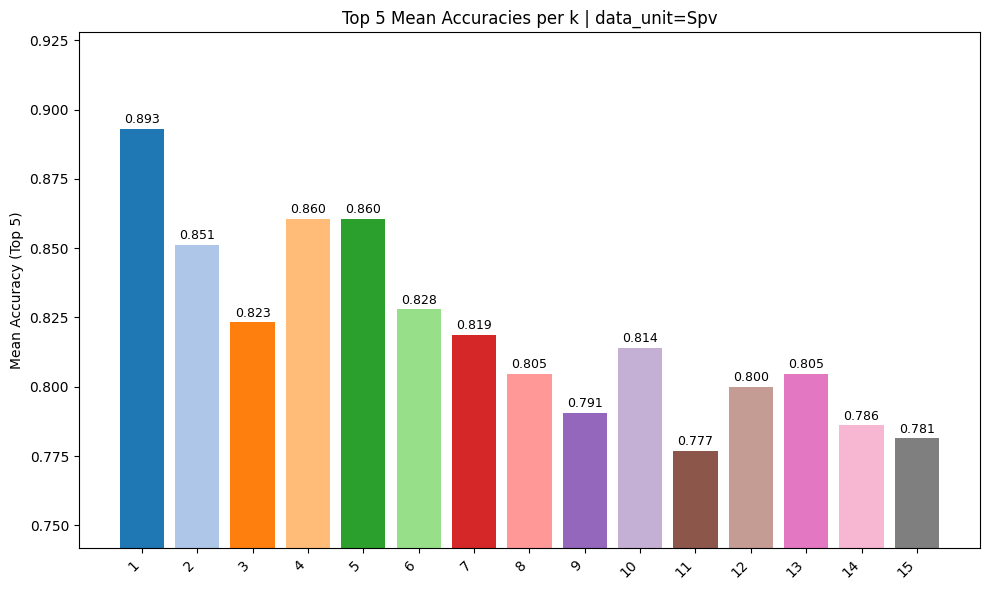

In [282]:
visualize(knn_scores_df, group_cols=[ 'k'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_S_PV])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


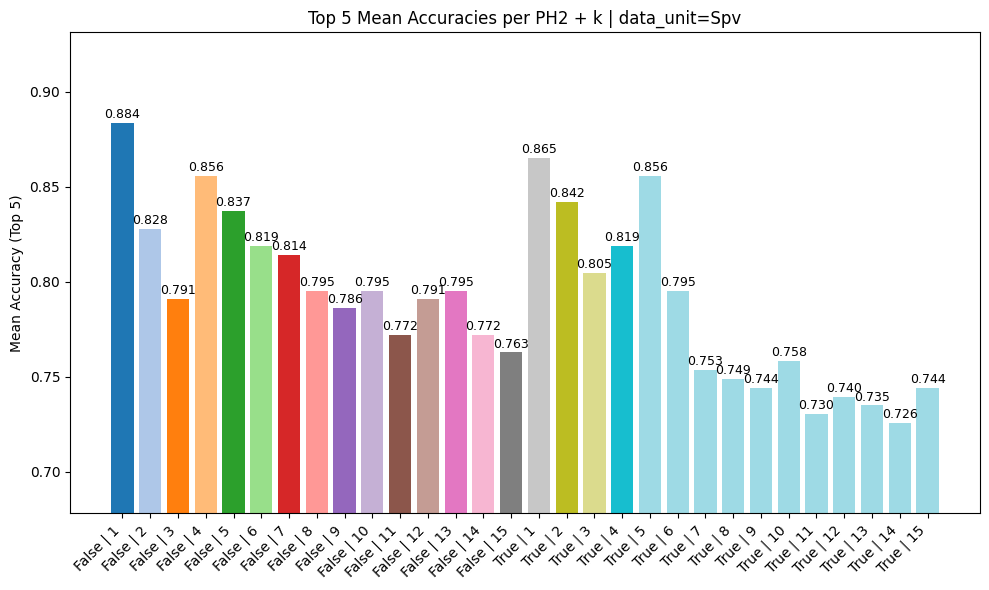

In [280]:
visualize(knn_scores_df, group_cols=['PH2', 'k'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_S_PV])

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_10835/1671360841.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20')(range(len(mean_accuracies)))


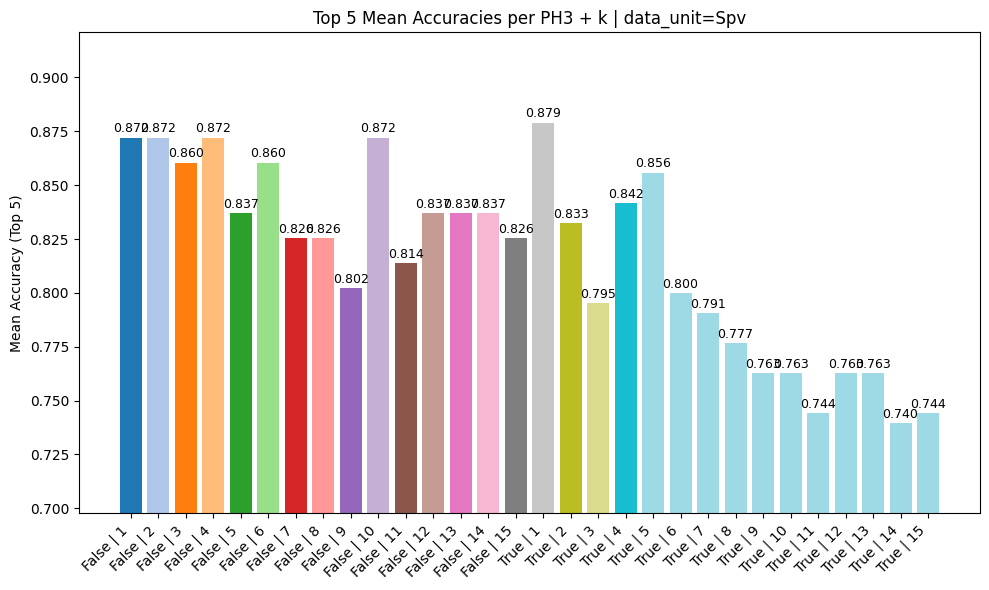

In [281]:
visualize(knn_scores_df, group_cols=['PH3', 'k'], top=5, filter_cols=['data_unit'], filter_values=[sup.DATA_S_PV])